<a href="https://colab.research.google.com/github/MeghaGhosh/MeghaGhosh.github.io/blob/master/Inceptionclassificationcarnoncar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/EivindArvesen/transfer-learning-demo.git

Cloning into 'transfer-learning-demo'...
remote: Enumerating objects: 20, done.
remote: Total 20 (delta 0), reused 0 (delta 0), pack-reused 20
Unpacking objects: 100% (20/20), done.


In [0]:
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages')

In [0]:
import matplotlib.image as img
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
!ls

sample_data  transfer-learning-demo


In [13]:
cd transfer-learning-demo


/content/transfer-learning-demo


In [14]:
!ls


dataset		 Presentasjon.pdf  submodules  Transfer-Learning.ipynb
environment.yml  README.md	   tf_files


In [16]:
!git submodule update --init --recursive

Submodule 'submodules/tensorflow-for-poets-2' (https://github.com/googlecodelabs/tensorflow-for-poets-2) registered for path 'submodules/tensorflow-for-poets-2'
Cloning into '/content/transfer-learning-demo/submodules/tensorflow-for-poets-2'...
Submodule path 'submodules/tensorflow-for-poets-2': checked out '45767a9d62b3b52dae97bf45838fa5701879fe31'


In [0]:
import os
import sys
module_path = os.path.abspath(os.path.join('./submodules/tensorflow-for-poets-2/scripts'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [18]:
IMAGE_SIZE = 224
ARCHITECTURE = "inception_v3"

#               USE MOBILENET FOR BETTER PERFORMANCE AND SMALLER SIZE AT THE EXPENSE OF ACCURACY, e.g.
# ARCHITECTURE = "mobilenet_0.50_"+str(IMAGE_SIZE)

%set_env IMAGE_SIZE "$IMAGE_SIZE"
%set_env ARCHITECTURE "$ARCHITECTURE"

env: IMAGE_SIZE="224"
env: ARCHITECTURE="inception_v3"


In [0]:
%%bash
tensorboard --logdir tf_files/training_summaries &

Process is interrupted.


In [0]:
import webbrowser
webbrowser.open('http://0.0.0.0:6006/')

False

In [0]:
conda env create -n transfer-learning -f environment.yml

SyntaxError: ignored

In [19]:
%%time
# Retrain the model on our dataset

import datetime
DATETIME = datetime.datetime.now().strftime("%Y-%m-%d_%H:%M:%S")
%set_env DATETIME "$DATETIME"

%run ./submodules/tensorflow-for-poets-2/scripts/retrain \
  --bottleneck_dir=tf_files/bottlenecks \
  --how_many_training_steps=4000 \
  --learning_rate=0.01 \
  --model_dir=tf_files/models/ \
  --summaries_dir=tf_files/training_summaries/"$ARCHITECTURE"_"$DATETIME" \
  --output_graph=tf_files/retrained_graph.pb \
  --output_labels=tf_files/retrained_labels.txt \
  --architecture="$ARCHITECTURE" \
  --image_dir=dataset/train

env: DATETIME="2020-02-28_11:31:27"



W0228 11:31:28.291525 140614645618560 module_wrapper.py:139] From /content/transfer-learning-demo/submodules/tensorflow-for-poets-2/scripts/retrain.py:970: The name tf.logging.set_verbosity is deprecated. Please use tf.compat.v1.logging.set_verbosity instead.

W0228 11:31:28.292586 140614645618560 module_wrapper.py:139] From /content/transfer-learning-demo/submodules/tensorflow-for-poets-2/scripts/retrain.py:970: The name tf.logging.INFO is deprecated. Please use tf.compat.v1.logging.INFO instead.

W0228 11:31:28.293625 140614645618560 module_wrapper.py:139] From /content/transfer-learning-demo/submodules/tensorflow-for-poets-2/scripts/retrain.py:835: The name tf.gfile.Exists is deprecated. Please use tf.io.gfile.exists instead.

W0228 11:31:28.294741 140614645618560 module_wrapper.py:139] From /content/transfer-learning-demo/submodules/tensorflow-for-poets-2/scripts/retrain.py:837: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.



>> Downloading inception-2015-12-05.tgz 100.0%


W0228 11:31:39.057016 140614645618560 module_wrapper.py:139] From /content/transfer-learning-demo/submodules/tensorflow-for-poets-2/scripts/retrain.py:338: The name tf.logging.info is deprecated. Please use tf.compat.v1.logging.info instead.

--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.6/logging/__init__.py", line 994, in emit
    msg = self.format(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 840, in format
    return fmt.format(record)
  File "/usr/local/lib/python3.6/dist-packages/absl/logging/__init__.py", line 938, in format
    return prefix + super(PythonFormatter, self).format(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 577, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.6/logging/__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_modul

CPU times: user 4min 42s, sys: 14.2 s, total: 4min 56s
Wall time: 5min 7s


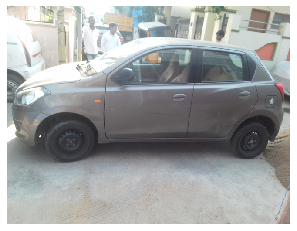

car 0.9202808
noncar 0.07971923
--------------------------------------------------------------------------------


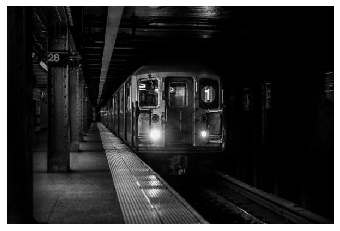

noncar 0.97522914
car 0.024770916
--------------------------------------------------------------------------------


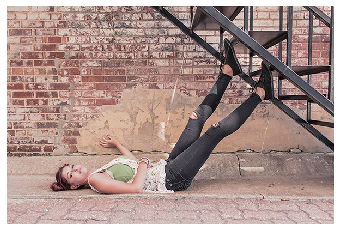

noncar 0.99742293
car 0.002577082
--------------------------------------------------------------------------------


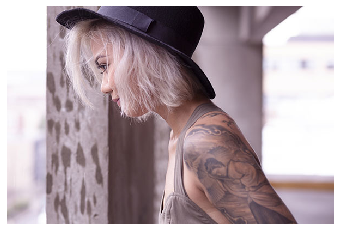

noncar 0.9988337
car 0.0011662584
--------------------------------------------------------------------------------


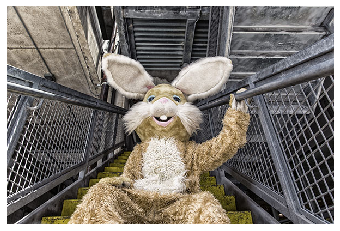

noncar 0.9997452
car 0.00025484554
--------------------------------------------------------------------------------


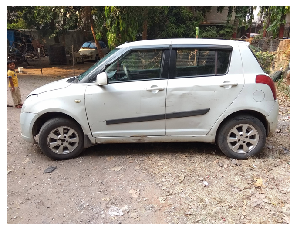

car 0.9848068
noncar 0.0151932435
--------------------------------------------------------------------------------


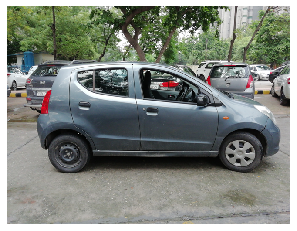

car 0.99517435
noncar 0.0048257057
--------------------------------------------------------------------------------


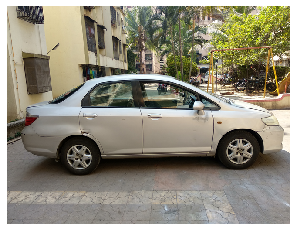

car 0.9914321
noncar 0.008567885
--------------------------------------------------------------------------------


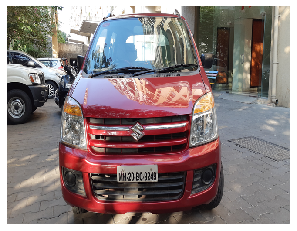

noncar 0.9791919
car 0.020808099
--------------------------------------------------------------------------------


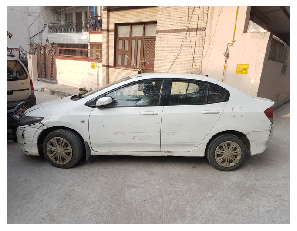

car 0.98747766
noncar 0.0125223175
--------------------------------------------------------------------------------


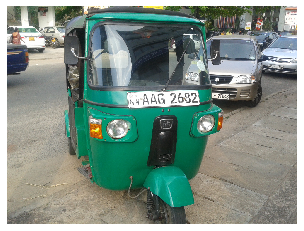

noncar 0.9997212
car 0.00027871624
--------------------------------------------------------------------------------


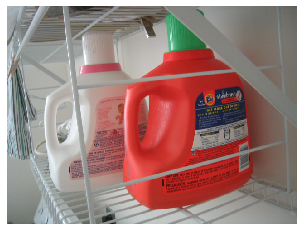

noncar 0.9959986
car 0.004001382
--------------------------------------------------------------------------------


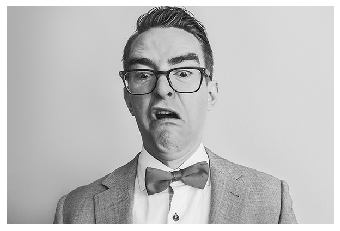

noncar 0.99522406
car 0.0047760135
--------------------------------------------------------------------------------


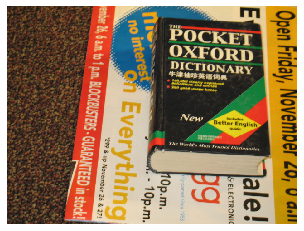

noncar 0.97180545
car 0.028194582
--------------------------------------------------------------------------------


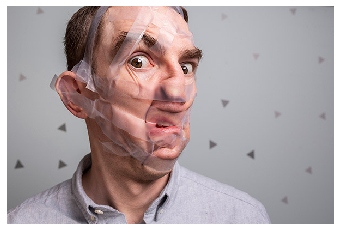

noncar 0.9894293
car 0.010570753
--------------------------------------------------------------------------------


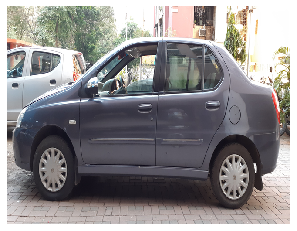

car 0.9924359
noncar 0.0075640744
--------------------------------------------------------------------------------


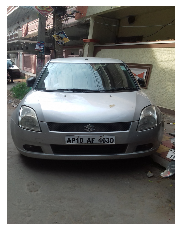

car 0.9080348
noncar 0.09196523
--------------------------------------------------------------------------------


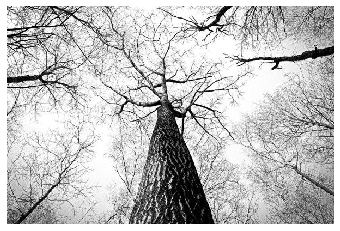

noncar 0.9945866
car 0.005413448
--------------------------------------------------------------------------------


In [23]:

# Test the model on data not previously used
import os

testdata='dataset/test/'

for filename in os.listdir(testdata):
    if not filename.startswith('.'):
    
        image=testdata+filename

        im = img.imread(image)
        plt.axis('off')
        plt.imshow(im)
        plt.show()
        
        # Input sizes and input layer name args are Inception specific; else (with MobileNet) use "$IMAGE_SIZE" for sizes

        %run ./submodules/tensorflow-for-poets-2/scripts/label_image \
          --graph=tf_files/retrained_graph.pb \
          --input_height=299 \
          --input_width=299 \
          --input_layer="Mul" \
          --image "$image"
        print("-"*80)